## Problem statement 
       
   - Our data set totally contains 21 columns .
   - We have clients data
        - age
        - education
        - job
        - default
        - housing 
        - contact
    
   -  We also have other attributes such as
         - pdays
         - poutcome
   
   - And other economic attributes such as
        - emp.var.rate (employee varation rate)
        - cons.price.idx (consumer price index)
        - cons.confi.idx (consumer confidence index)
  
### We are required to build a realistic predictive model on whether a client will subscribe for a fixed deposit or not  by using the client's data and other input features.
   
### And we are also required to suggest ways to improve the performance of the marketing campaign for better results on fixed deposits .

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy

# Extracting the excel data

In [2]:
bank_marketing_data=pd.read_excel(r"c:\Users\ROOT\Downloads\Bank Marketing Dataset.xlsx")
bank_data=bank_marketing_data
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Understanding
## Exploratory Data Analysis

In [5]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


OBSERVATION :

  - describe() function gives us the summary statistics of our dataset
      
      
      - (count) Our data totally contains 41188 rows and 21 columns.
      - (mean)  shows the average values of the input features.
      - (std)   shows how much the data is deviated.
      - (min,25%,50%,75%,max) shows the range ie the minimum,25th value,50th value,75th value,and maximum.
            For age the minimum value is 17
                    25th value is 32
                    50th value is 38
                    75th value is 47 
                    maximum value is 98.

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

OBSERVATION :  
  
  - From info() function we can get a general understanding of the data especially about nullvalues and dtypes 
    
       - we can see that there are no null values in our dataset. 
       - The datatypes in our data are object , int , float. which means we also have categorical variables.
         From the total of 21 columns we have 
                11 columns with dtype - object
                5  columns with dtype - int
                5  columns with dtype - float
       - There are categorical values in our data therfore we need to encode those categorical values into numerical values.
       - We have data about the clients as well as about the previous campaign.
       - The 20 th column y is our target feature.
  
  

In [7]:
bank_data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

OBERVATION :
     
   - From nunique() function we can see the number of unique values in each columns in our dataset.
          - age column has 78 unique values
          - job column has 12 unique values 
          - marital column 4 unique values ,.etc

In [8]:
bank_data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

OBSERVATION :
   
   
   - We totally have 4252 times failure result of our previous campaign and just 1373 number of success result .
   - From the above data we can interpret that our previous campaign's performance is ineffective and inefficient , therefore
       we need to suggest ways to improve our marketing campaign's performance .

In [7]:
## groupby interpretations

In [9]:
bank_data.groupby(['age','job','y']).size().head(60)

age  job            y  
17   student        no      3
                    yes     2
18   student        no     16
                    yes    12
19   student        no     22
                    yes    20
20   admin.         no      1
     blue-collar    no      7
     entrepreneur   no      4
     services       no      3
     student        no     25
                    yes    21
     technician     no      2
                    yes     2
21   admin.         no     11
                    yes     1
     blue-collar    no     14
                    yes     1
     housemaid      no      1
     management     no      1
     self-employed  no      1
                    yes     1
     services       no     11
                    yes     1
     student        no     30
                    yes    24
     technician     no      2
     unemployed     no      2
                    yes     1
22   admin.         no      9
                    yes     4
     blue-collar    no     29
                

OBSERVATION :
    
   - groupby() function gives a grouped comparison on age , job , y columns.
       - we can clearly see that around age 18 to 23 a person  who subscribed a fixed deposits is a student.

In [10]:
bank_data.groupby(['age','job','y']).size().tail(60)

age  job          y  
72   retired      yes    11
     unknown      yes     1
73   retired      no     21
                  yes    13
74   retired      no     17
                  yes    15
75   housemaid    no      2
     retired      no     11
                  yes    11
76   housemaid    yes     2
     management   no      1
                  yes     1
     retired      no     15
                  yes    14
     unknown      yes     1
77   management   no      1
                  yes     1
     retired      no      6
                  yes    12
78   retired      no     12
                  yes    13
     unknown      no      1
                  yes     1
79   housemaid    yes     1
     retired      no      7
                  yes     6
80   blue-collar  no      1
     housemaid    yes     1
     management   yes     1
     retired      no     12
                  yes    16
81   housemaid    no      2
     retired      no     10
                  yes     6
     unknown      yes     

OBSERVATION :
    - we can see that around the age of 72 to 98 a person who subscribed a fixed deposit is a retired person.

In [11]:
bank_data[bank_data['y']=='yes'].groupby('education').size().reset_index()

,education,0
0,basic.4y,428
1,basic.6y,188
2,basic.9y,473
3,high.school,1031
4,illiterate,4
5,professional.course,595
6,university.degree,1670
7,unknown,251


OBSERVATION :
   
   - We are intrepreting clints with their education status who have subscribed for fixed deposits by this way we can find the average clints education who subscribed a fixed deposits.
   - The maximum number of person who subscribed for a fixed deposit has a education qualification of an "university degree"           and followed by the a "high school" qualification.

In [12]:
bank_data[bank_data['y']=='yes'].groupby('job').size().reset_index()

,job,0
0,admin.,1352
1,blue-collar,638
2,entrepreneur,124
3,housemaid,106
4,management,328
5,retired,434
6,self-employed,149
7,services,323
8,student,275
9,technician,730


OBSERVATION :

Under job category
         
  - A person with job as "admin" has the maximum number of fixed deposits subscribtion and followed by that we have 
    "blue-collar" job.

In [13]:
bank_data.groupby(['default','housing','loan','y']).size()

default  housing  loan     y  
no       no       no       no     11037
                           yes     1569
                  yes      no      1758
                           yes      250
         unknown  unknown  no       667
                           yes       96
         yes      no       no     12334
                           yes     1909
                  yes      no      2595
                           yes      373
unknown  no       no       no      3274
                           yes      183
                  yes      no       525
                           yes       24
         unknown  unknown  no       216
                           yes       11
         yes      no       no      3452
                           yes      189
                  yes      no       687
                           yes       36
yes      no       no       no         2
         yes      no       no         1
dtype: int64

OBERVATION :
    
   -  We can interpret that an average client who already have a credit transaction and  housing loan and also personal loan does not opt for fixed deposits.

In [13]:
## visualizations through graphs

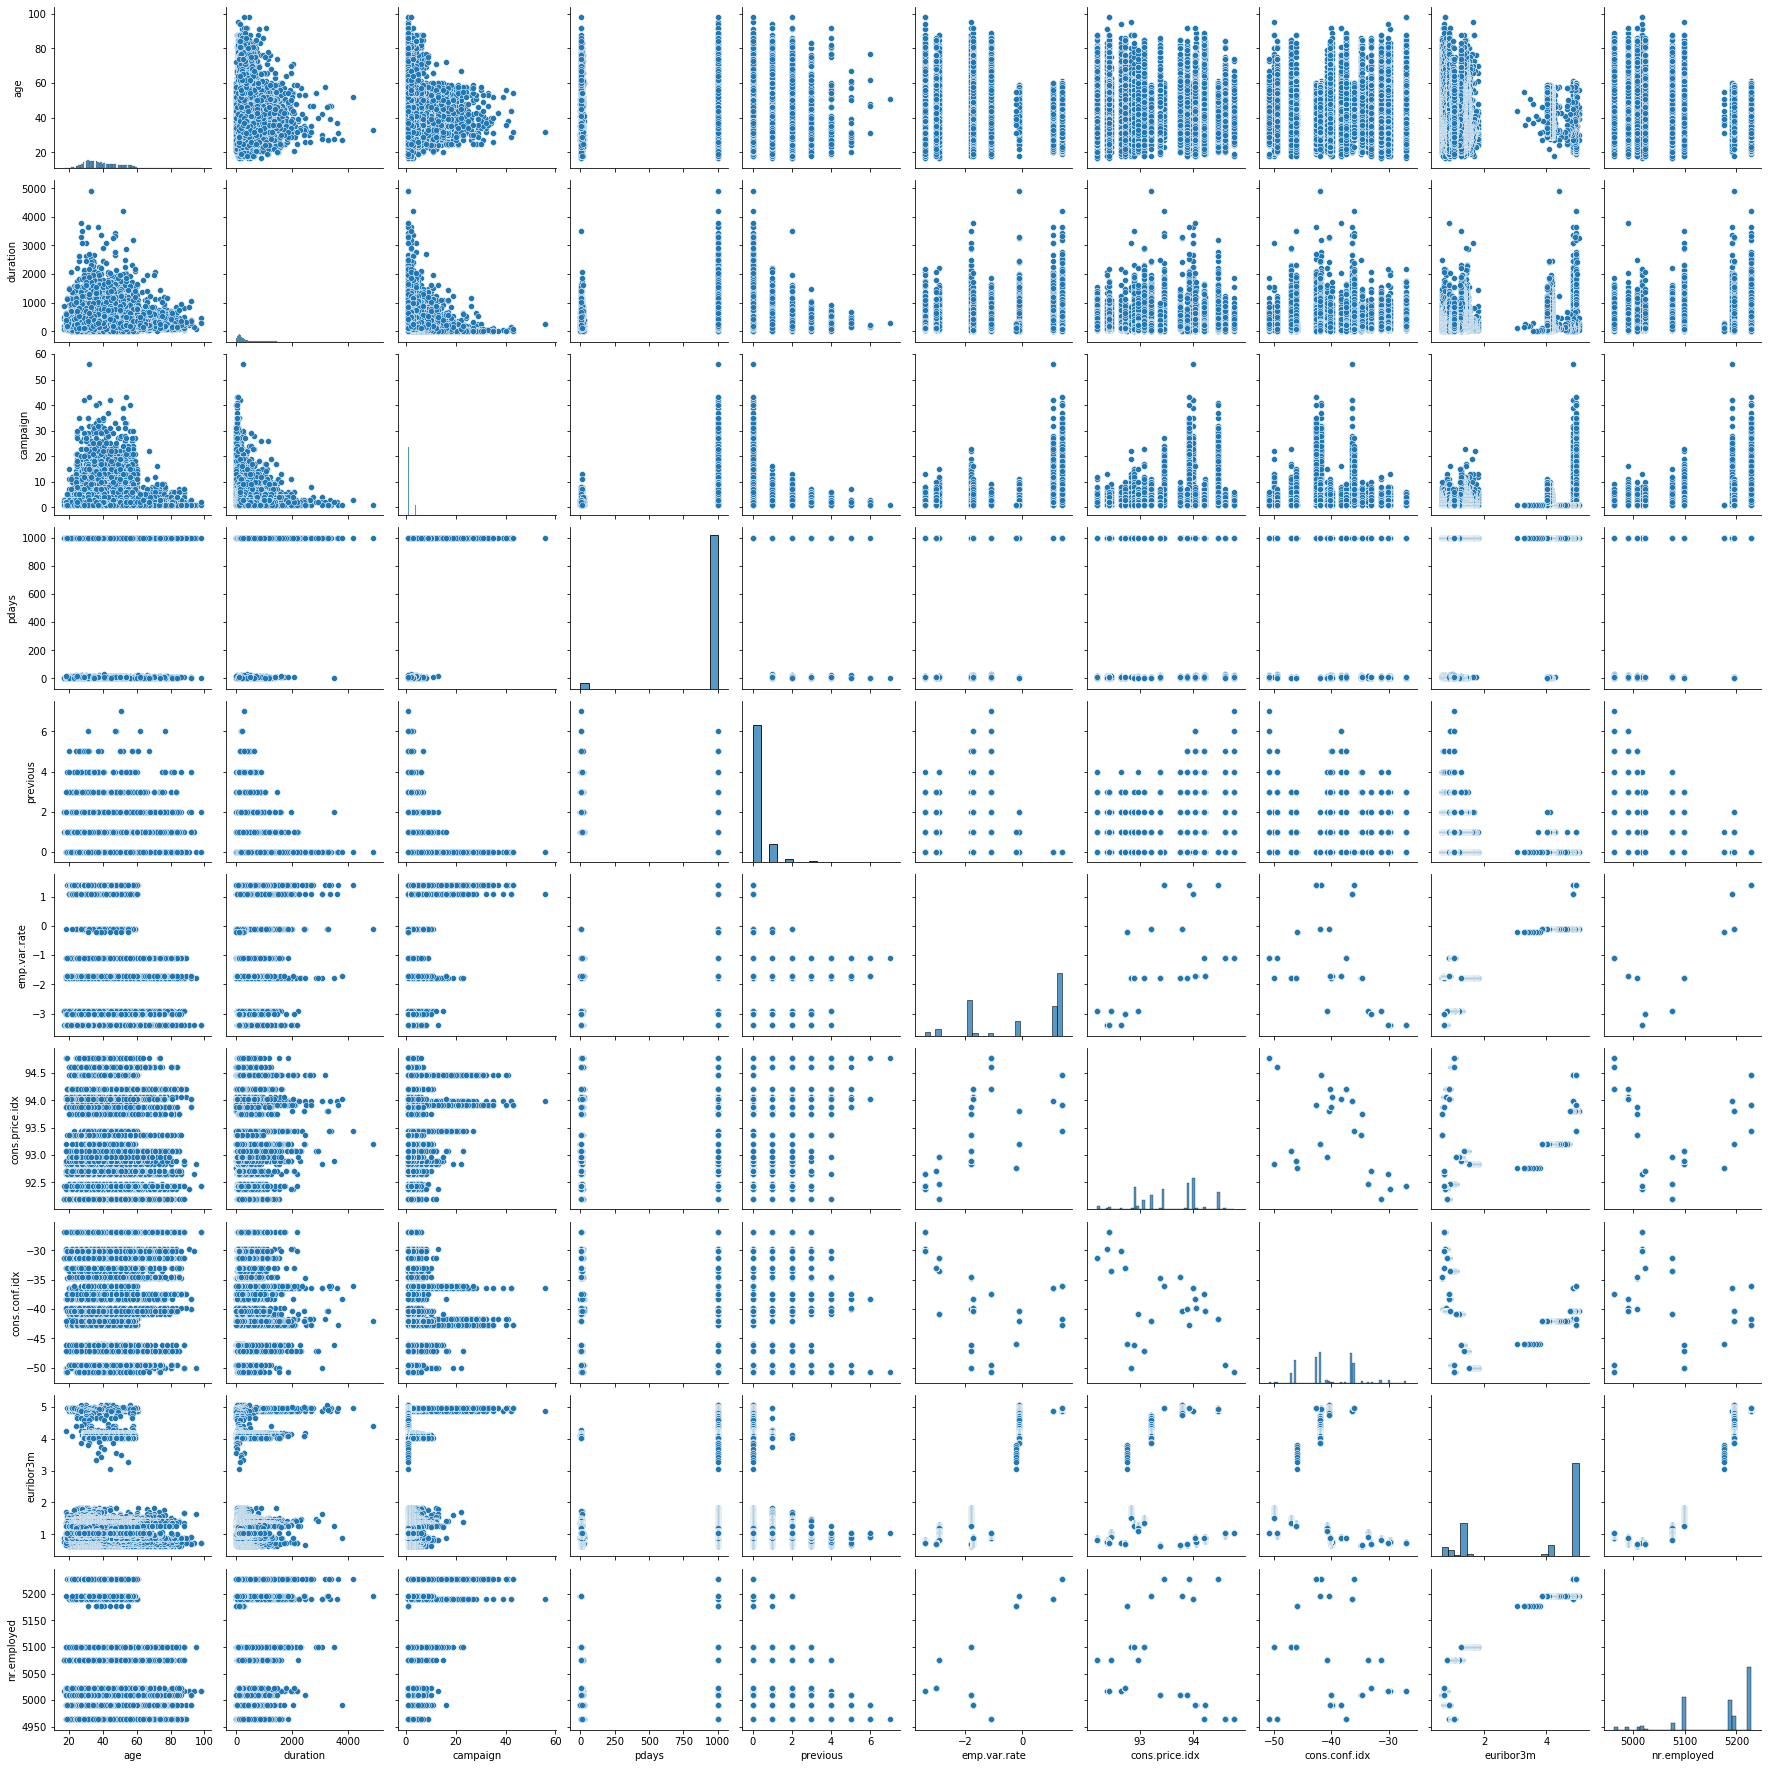

In [14]:
sns.pairplot(bank_data)

OBSERVATION :

sns.pairplot function plots graphs for getting an idea about our data , understanding the trends and pattens in our data.         
   - As our data contains categorical values and  many outliers and noise we can only get a few information such as 
        
           - Mostly people of age from 24 to 60 have enquired about fixed deposits for about 2 minutes .
           - And mostly people of age from 20 to 60 have been contacted during the current campaign.

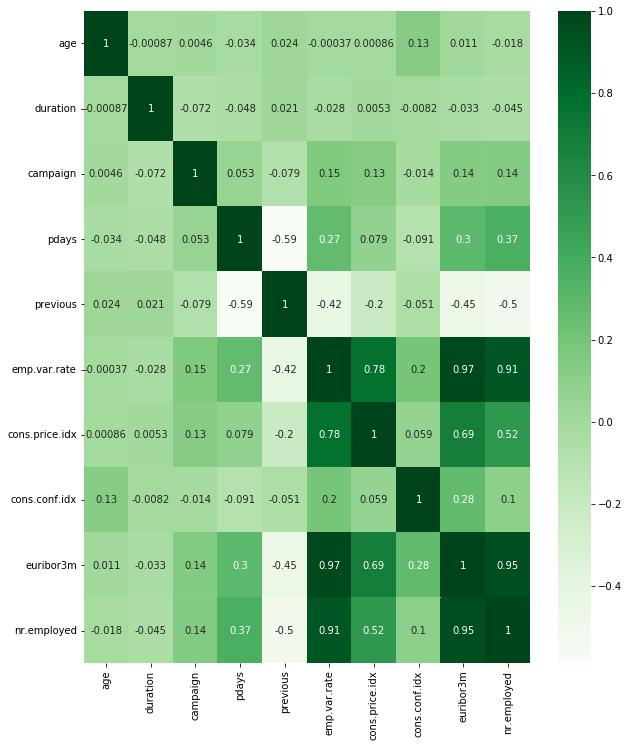

In [16]:
plt.figure(figsize=(10,12))
sns.heatmap(bank_data.corr(),cmap='Greens',annot=True)

OBSERVATION :

 - plotting a heatmap to visualize correlations between the features

  
  - The darker areas represents positive correlation 
         -  emp.var.rate feature have a strong positive correlation with euribor3m and nr.employed features
  - The lighter area represents negative correlation
         -  duration feature have a strong negative correlation with age feature
         -  pdays feature have a strong negative correlation with cons.conf.idx

# Data Preparation
# Feature Engineering(encoding)
          we need to prepare the data for machine learning modeling .
          our data contains many categorical values(non numerical values) and computer cannot process categorical values 
          therfore we need to convert all categorical columns into numerical columns .

# Label encoding        
For default , housing , loan  , y columns     
       
   -  LABELENCODER is a feature engineering technique that assigns values from 0 to n-1 for the columns that have categorical variables.

### Importing label encoder from sklearn

In [17]:
from sklearn.preprocessing import LabelEncoder
lblencoder=LabelEncoder()

    Encoding default , housing , loan ,  y  columns

In [18]:
bank_data.default=lblencoder.fit_transform(bank_data['default'])

In [19]:
bank_data.housing=lblencoder.fit_transform(bank_data['housing'])

In [20]:
bank_data.loan=lblencoder.fit_transform(bank_data['loan'])

In [21]:
bank_data.y=lblencoder.fit_transform(bank_data['y'])

      we can see default , housing , loan , y columns are converted into 0's and 1's and 2's (numerical                                                                                                                       values)

In [22]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,2,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,2,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


# One Hot Encoding
For job , marital , education ,poutcome columns
      
   - It is another feature engineering technique which is used to convert categorical values into numerical values by creating new columns for the categories present in a feature.

In [20]:
### pd.get_dummies is the key code by pandas for one hot encoding .

     Encoding job column 

In [23]:
df=pd.get_dummies(bank_data['job'],drop_first=True)
df1=pd.DataFrame(df)
df1

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0
41184,1,0,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,1,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,1,0,0


       Encoding education column

In [24]:
df2=pd.get_dummies(bank_data['education'],drop_first=True)
df3=pd.DataFrame(df2)
df3

,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0
41184,0,0,0,0,1,0,0
41185,0,0,0,0,0,1,0
41186,0,0,0,0,1,0,0


          encoding marital column

In [25]:
df4=pd.get_dummies(bank_data['marital'],drop_first=True)
df5=pd.DataFrame(df4)
df5

,married,single,unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
41183,1,0,0
41184,1,0,0
41185,1,0,0
41186,1,0,0


          encoding poutcome column

In [26]:
df6=pd.get_dummies(bank_data['poutcome'],drop_first=True)
df7=pd.DataFrame(df6)
df7

,nonexistent,success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41183,1,0
41184,1,0
41185,1,0
41186,1,0


    joining df1 , df3 , df5 , df7 and bank_data dataframes using concate

In [27]:
bank1=pd.concat([df1,df5,df3,df7,bank_data],axis=1,join='inner')
bank1

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,1,0,0,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,1,0,0,0,0,0,0,0,0,0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,0,0,0,0,1,0,0,0,0,0,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,0,0,0,0,0,0,0,0,1,0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
## dropping job and education , marital , poutcome features as they are created as new encoded columns

In [28]:
bank2=bank1.drop(['job','marital','education','poutcome'],axis=1)
bank2

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,1,0,0,0,0,0,0,0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,1,0,0,0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,0,0,0,0,0,1,0,0,0,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,0,0,0,0,0,0,0,0,0,0,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,0,0,0,0,0,1,0,0,0,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,1,0,0,0,0,0,0,0,0,0,...,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,0,0,0,0,1,0,0,0,0,0,...,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,0,0,0,0,0,0,0,0,1,0,...,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


# FEATURE SELECTION

        Our data totally contains 40 columns and we need to reduce the features or inputs to only key features .
        Irrelevent features can negatively impact our model. 
        Therefore we are removing irrelevant columns like contact, month, day of week.
        
        Duration column contains the duration of last call , this feature highly affects the target feature , if duration is unknown then it takes y as NO.And this feature is not recommended to include while building a realistic predictive model Therefore we are removing duration feature.
          
        
          
       


In [29]:
bank3=bank2.drop(['contact','month','day_of_week'],axis=1)

In [30]:
bank3.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,1,0,0,0,0,0,0,0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,1,0,0,0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,0,0,0,0,0,1,0,0,0,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,0,0,0,0,0,0,0,0,0,0,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,0,0,0,0,0,1,0,0,0,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [31]:
bank3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   blue-collar          41188 non-null  uint8  
 1   entrepreneur         41188 non-null  uint8  
 2   housemaid            41188 non-null  uint8  
 3   management           41188 non-null  uint8  
 4   retired              41188 non-null  uint8  
 5   self-employed        41188 non-null  uint8  
 6   services             41188 non-null  uint8  
 7   student              41188 non-null  uint8  
 8   technician           41188 non-null  uint8  
 9   unemployed           41188 non-null  uint8  
 10  unknown              41188 non-null  uint8  
 11  married              41188 non-null  uint8  
 12  single               41188 non-null  uint8  
 13  unknown              41188 non-null  uint8  
 14  basic.6y             41188 non-null  uint8  
 15  basic.9y             41188 non-null 

In [32]:
bank3.columns

Index(['blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'married', 'single', 'unknown', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course', 'university.degree',
       'unknown', 'nonexistent', 'success', 'age', 'default', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Removing Outliers
   
  -  Outliers are data points that are away or they are differ from the rest of the data points.
  -  outliers can be due to variability in measurement or due to experimental error.

In [33]:
# box plot to visualize the features
def plot_boxplot(data,feat):
    data.boxplot(column=[feat])
    plt.grid(False)
    plt.show()

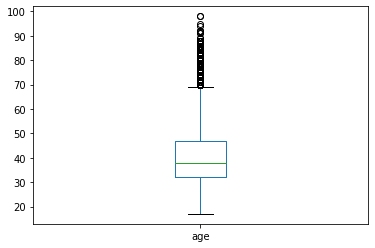

In [34]:
plot_boxplot(bank3,'age')

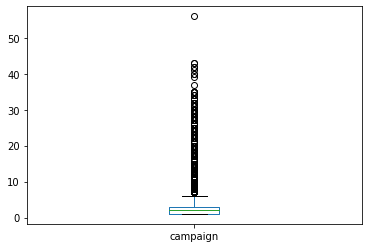

In [35]:
plot_boxplot(bank3,'campaign')

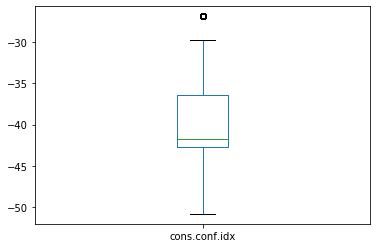

In [36]:
plot_boxplot(bank3,'cons.conf.idx')

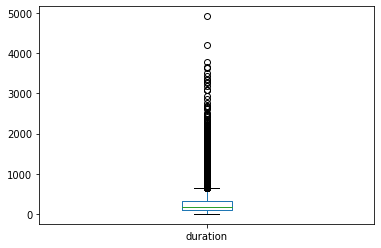

In [37]:
plot_boxplot(bank3,'duration')

# Feature Scaling
         Our data contains int values , float values ,uint values .
         Therefore we need to rescale our data .
# Normalizing
         Normalizing is a technique that rescales our data values into 0's and 1's .
         Since our data contains values that are with one digit and two or three digit,we need to normalize our entire data.
         By normalizing we are preparing our data for better model performance.

In [32]:
## normalizing only input features

In [38]:
from sklearn import preprocessing
bank1_norm=preprocessing.normalize(bank3.iloc[:,:-1])
bank_norm=pd.DataFrame(bank1_norm)
bank_norm.columns=bank3.iloc[:,:-1].columns
bank_norm

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.000000,0.0,0.000189,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.049302,0.000189,0.188706,0.000000,0.000208,0.017755,-0.006876,0.000917,0.980553
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000189,0.0,0.000000,0.0,...,0.000000,0.028168,0.000189,0.188860,0.000000,0.000208,0.017770,-0.006881,0.000918,0.981355
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000189,0.0,0.000000,0.0,...,0.000000,0.042705,0.000189,0.188769,0.000000,0.000208,0.017761,-0.006878,0.000918,0.980882
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.028547,0.000189,0.188864,0.000000,0.000208,0.017770,-0.006882,0.000918,0.981374
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000189,0.0,0.000000,0.0,...,0.000378,0.057964,0.000189,0.188618,0.000000,0.000208,0.017747,-0.006873,0.000917,0.980096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.000000,0.0,0.000000,0.0,0.000197,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.065802,0.000197,0.196816,0.000000,-0.000217,0.018670,-0.010008,0.000203,0.977894
41184,0.000197,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.075409,0.000197,0.196694,0.000000,-0.000217,0.018659,-0.010002,0.000202,0.977289
41185,0.000000,0.0,0.000000,0.0,0.000197,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.037292,0.000395,0.197115,0.000000,-0.000217,0.018699,-0.010023,0.000203,0.979379
41186,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000197,0.0,...,0.000000,0.086944,0.000197,0.196510,0.000000,-0.000216,0.018641,-0.009993,0.000202,0.976372


In [34]:
## joining y(target feature) into our normalized data

In [39]:
bank_norm['y']=bank3['y']
bank_norm

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.000000,0.0,0.000189,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.049302,0.000189,0.188706,0.000000,0.000208,0.017755,-0.006876,0.000917,0.980553,0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000189,0.0,0.000000,0.0,...,0.028168,0.000189,0.188860,0.000000,0.000208,0.017770,-0.006881,0.000918,0.981355,0
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000189,0.0,0.000000,0.0,...,0.042705,0.000189,0.188769,0.000000,0.000208,0.017761,-0.006878,0.000918,0.980882,0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.028547,0.000189,0.188864,0.000000,0.000208,0.017770,-0.006882,0.000918,0.981374,0
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000189,0.0,0.000000,0.0,...,0.057964,0.000189,0.188618,0.000000,0.000208,0.017747,-0.006873,0.000917,0.980096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.000000,0.0,0.000000,0.0,0.000197,0.0,0.000000,0.0,0.000000,0.0,...,0.065802,0.000197,0.196816,0.000000,-0.000217,0.018670,-0.010008,0.000203,0.977894,1
41184,0.000197,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.075409,0.000197,0.196694,0.000000,-0.000217,0.018659,-0.010002,0.000202,0.977289,0
41185,0.000000,0.0,0.000000,0.0,0.000197,0.0,0.000000,0.0,0.000000,0.0,...,0.037292,0.000395,0.197115,0.000000,-0.000217,0.018699,-0.010023,0.000203,0.979379,0
41186,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000197,0.0,...,0.086944,0.000197,0.196510,0.000000,-0.000216,0.018641,-0.009993,0.000202,0.976372,1


 - we can see that all the categorical value are converted into numerical values.
 - we have a total of 36 columns including target feature .

## Seperating independent and dependent(target) features
  
   - With input feature and output feature split we can tell machine to look at the input features first and compare it on with output feature.

In [40]:
x=bank_norm.iloc[:,:-1]
y=bank_norm['y']

In [41]:
x

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,...,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.000000,0.0,0.000189,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.049302,0.000189,0.188706,0.000000,0.000208,0.017755,-0.006876,0.000917,0.980553
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000189,0.0,0.000000,0.0,...,0.000000,0.028168,0.000189,0.188860,0.000000,0.000208,0.017770,-0.006881,0.000918,0.981355
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000189,0.0,0.000000,0.0,...,0.000000,0.042705,0.000189,0.188769,0.000000,0.000208,0.017761,-0.006878,0.000918,0.980882
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.028547,0.000189,0.188864,0.000000,0.000208,0.017770,-0.006882,0.000918,0.981374
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000189,0.0,0.000000,0.0,...,0.000378,0.057964,0.000189,0.188618,0.000000,0.000208,0.017747,-0.006873,0.000917,0.980096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.000000,0.0,0.000000,0.0,0.000197,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.065802,0.000197,0.196816,0.000000,-0.000217,0.018670,-0.010008,0.000203,0.977894
41184,0.000197,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.075409,0.000197,0.196694,0.000000,-0.000217,0.018659,-0.010002,0.000202,0.977289
41185,0.000000,0.0,0.000000,0.0,0.000197,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.037292,0.000395,0.197115,0.000000,-0.000217,0.018699,-0.010023,0.000203,0.979379
41186,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000197,0.0,...,0.000000,0.086944,0.000197,0.196510,0.000000,-0.000216,0.018641,-0.009993,0.000202,0.976372


In [42]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

# Feature selection
     - Even after removing irreleven feature from our data we still can 35 input features . Therefore we can remove features that does not have any importance or role for building our model.

# By Extra tree classifier
       Extra tree classifier is a feature importance technique which gives a score for each features in our data ,the higher the score the more important the feature is .
       Comparing x(independent feature's importance ) with y(dependent feature)

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
feat_imp=ExtraTreesClassifier()
feat_imp.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [44]:
print(feat_imp.feature_importances_)

[0.01223703 0.00476475 0.00387205 0.00871516 0.00915436 0.00555054
 0.00787879 0.00656043 0.01355576 0.00493379 0.00207338 0.02094621
 0.01731383 0.00065198 0.00545495 0.01006487 0.01372643 0.00023608
 0.01023255 0.01853828 0.00623817 0.03678219 0.03148924 0.04630496
 0.01114208 0.02857292 0.01722034 0.11095882 0.03768487 0.10268084
 0.01478058 0.06234096 0.06967333 0.06184171 0.09218701 0.09364078]


In [42]:
## visualizing the importance score of each input features through bar graph

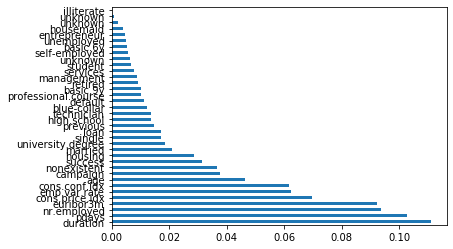

<Figure size 3600x2160 with 0 Axes>

In [45]:
rank_fet=pd.Series(feat_imp.feature_importances_,index=x.columns)
rank_fet.nlargest(36).plot(kind='barh')
plt.figure(figsize=(50,30))
plt.show()

 - We can see that 
    - illiterate
    - unknown
    - housemaid 
    - student
    - unemployed
    - entreprenuer are the features with very low importance score.
 - Therefore we can remove those features .

# By Information Gain
       Mutual information gain is a feature importance method that gives a value on how much a independent feature is in                depentent or in relationship with dependent variable(target variable)

In [46]:
from sklearn.feature_selection import mutual_info_classif
mutualinfo_data=mutual_info_classif(x,y)
mutualinfo_data

array([0.02622494, 0.00384483, 0.00342855, 0.0103412 , 0.01342493,
       0.0027649 , 0.01002407, 0.00583651, 0.02419387, 0.00387979,
       0.00220832, 0.0881824 , 0.04419713, 0.        , 0.00715767,
       0.02037931, 0.03287456, 0.        , 0.01962085, 0.05122113,
       0.00666811, 0.11696177, 0.03196196, 0.09248409, 0.02540554,
       0.07903583, 0.02483294, 0.11536249, 0.1427545 , 0.14865943,
       0.04596976, 0.16199202, 0.11855969, 0.14878367, 0.13846613,
       0.12975021])

In [47]:
mutualinfo_values=pd.Series(mutualinfo_data,index=x.columns)
mutualinfo_values.sort_values(ascending=True)

illiterate             0.000000
unknown                0.000000
unknown                0.002208
self-employed          0.002765
housemaid              0.003429
entrepreneur           0.003845
unemployed             0.003880
student                0.005837
unknown                0.006668
basic.6y               0.007158
services               0.010024
management             0.010341
retired                0.013425
professional.course    0.019621
basic.9y               0.020379
technician             0.024194
loan                   0.024833
default                0.025406
blue-collar            0.026225
success                0.031962
high.school            0.032875
single                 0.044197
previous               0.045970
university.degree      0.051221
housing                0.079036
married                0.088182
age                    0.092484
duration               0.115362
nonexistent            0.116962
cons.price.idx         0.118560
nr.employed            0.129750
euribor3

 Similarly 
 - We can see that          
     - unknown 
     - unknown
     - unemployed
     - illiterate
     - entrepreneur           
     - housemaid 
     - self-employed
     - basic.6y
     - management
     - unknown  are the features that does not have a strong relationship or dependency on the target variable        
       Therefore we can remove those featues.
    

In [95]:
### dropping features that have low importance score

In [49]:
x_new=x.drop(['unknown','unknown','illiterate','entrepreneur','self-employed','housemaid','unemployed'],axis=1)
x_new

,blue-collar,management,retired,services,student,technician,married,single,basic.6y,basic.9y,...,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000189,0.0,0.000000,0.0,...,0.000000,0.049302,0.000189,0.188706,0.000000,0.000208,0.017755,-0.006876,0.000917,0.980553
1,0.000000,0.0,0.000000,0.000189,0.0,0.000000,0.000189,0.0,0.000000,0.0,...,0.000000,0.028168,0.000189,0.188860,0.000000,0.000208,0.017770,-0.006881,0.000918,0.981355
2,0.000000,0.0,0.000000,0.000189,0.0,0.000000,0.000189,0.0,0.000000,0.0,...,0.000000,0.042705,0.000189,0.188769,0.000000,0.000208,0.017761,-0.006878,0.000918,0.980882
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000189,0.0,0.000189,0.0,...,0.000000,0.028547,0.000189,0.188864,0.000000,0.000208,0.017770,-0.006882,0.000918,0.981374
4,0.000000,0.0,0.000000,0.000189,0.0,0.000000,0.000189,0.0,0.000000,0.0,...,0.000378,0.057964,0.000189,0.188618,0.000000,0.000208,0.017747,-0.006873,0.000917,0.980096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.000000,0.0,0.000197,0.000000,0.0,0.000000,0.000197,0.0,0.000000,0.0,...,0.000000,0.065802,0.000197,0.196816,0.000000,-0.000217,0.018670,-0.010008,0.000203,0.977894
41184,0.000197,0.0,0.000000,0.000000,0.0,0.000000,0.000197,0.0,0.000000,0.0,...,0.000000,0.075409,0.000197,0.196694,0.000000,-0.000217,0.018659,-0.010002,0.000202,0.977289
41185,0.000000,0.0,0.000197,0.000000,0.0,0.000000,0.000197,0.0,0.000000,0.0,...,0.000000,0.037292,0.000395,0.197115,0.000000,-0.000217,0.018699,-0.010023,0.000203,0.979379
41186,0.000000,0.0,0.000000,0.000000,0.0,0.000197,0.000197,0.0,0.000000,0.0,...,0.000000,0.086944,0.000197,0.196510,0.000000,-0.000216,0.018641,-0.009993,0.000202,0.976372


# Train Test Split
       Spliting the data seperately into training set and testing set

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=0)

In [51]:
x_train.shape

(28831, 28)

In [52]:
x_test.shape

(12357, 28)

In [53]:
y_train.shape

(28831,)

In [54]:
y_test.shape

(12357,)

# By Pearson Correlation

     Finding the independent feature which has high correlation with dependent feature as those features plays a major role.
     Finding features which are highly correlated with each other as they behave like duplicate features .

In [ ]:
### Inorder to avoid overfitting we are applying correlation matrix only on the x_train data .

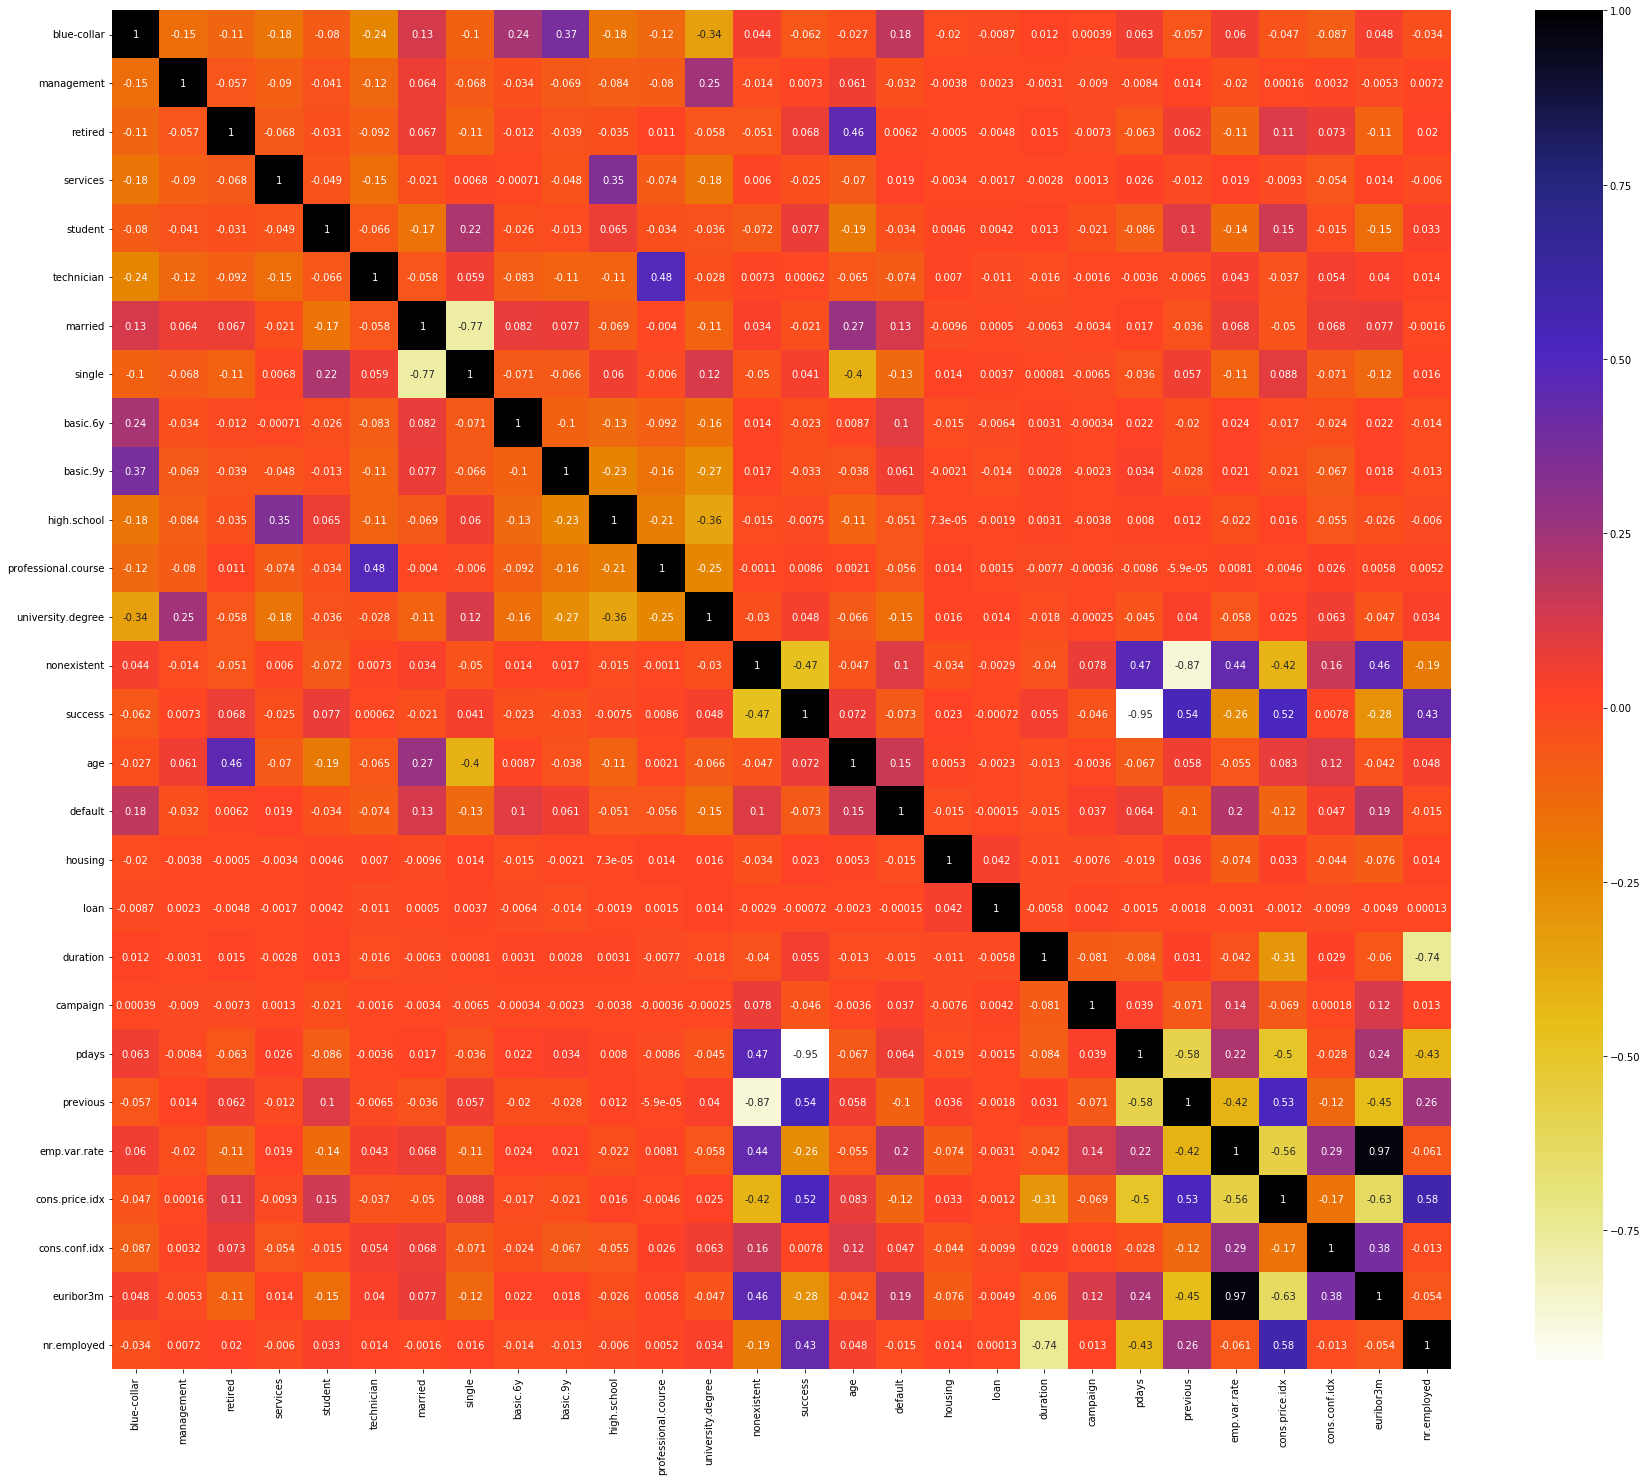

In [58]:
plt.figure(figsize=(30,25))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r,linecolor='blue')

In [59]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                 colname=corr_matrix.columns[i]
                 col_corr.add(colname)
    return col_corr

In [60]:
corr_feature=correlation(x_train,0.8)
corr_feature

{'euribor3m', 'pdays', 'previous'}

 - We can see that 
  - euribor3m , nr.employed , pdays are the featurs that have high correlaion .
    Therefore we can remove those features.

In [ ]:
### dropping high correlated feature on x_train

In [61]:
x_train_new=x_train.drop(['euribor3m','previous','pdays'],axis=1)
x_train_new

,blue-collar,management,retired,services,student,technician,married,single,basic.6y,basic.9y,...,age,default,housing,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
31880,0.000000,0.000192,0.0,0.000000,0.0,0.0,0.000192,0.000000,0.0,0.000000,...,0.007114,0.000192,0.000000,0.000385,0.037494,0.000192,-0.000346,0.017861,-0.008883,0.980433
38177,0.000000,0.000195,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.010543,0.000195,0.000390,0.000000,0.041783,0.000195,-0.000664,0.018047,-0.005252,0.979665
2459,0.000187,0.000000,0.0,0.000000,0.0,0.0,0.000187,0.000000,0.0,0.000187,...,0.009160,0.000187,0.000000,0.000000,0.151974,0.000374,0.000206,0.017570,-0.006804,0.970356
756,0.000000,0.000000,0.0,0.000189,0.0,0.0,0.000189,0.000000,0.0,0.000000,...,0.005674,0.000000,0.000378,0.000000,0.009645,0.000567,0.000208,0.017776,-0.006884,0.981740
11275,0.000187,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000187,0.0,0.000187,...,0.004310,0.000000,0.000000,0.000000,0.067281,0.000187,0.000262,0.017704,-0.007834,0.979809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.009714,0.000000,0.000000,0.000000,0.104424,0.000374,0.000262,0.017456,-0.006744,0.976639
32103,0.000000,0.000192,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.010769,0.000000,0.000000,0.000000,0.031923,0.000192,-0.000346,0.017864,-0.008885,0.980591
30403,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000192,0.0,0.000000,...,0.005561,0.000000,0.000000,0.000000,0.081884,0.000575,-0.000345,0.017849,-0.009032,0.977836
21243,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000188,0.0,0.000000,...,0.006573,0.000000,0.000376,0.000376,0.020845,0.000188,0.000263,0.017548,-0.006779,0.981820


In [96]:
### dropping the high correlated feature on x_test

In [62]:
x_test_new=x_test.drop(['euribor3m','previous','pdays'],axis=1)
x_test_new

,blue-collar,management,retired,services,student,technician,married,single,basic.6y,basic.9y,...,age,default,housing,loan,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
15500,0.000187,0.0,0.0,0.000000,0.0,0.000000,0.000187,0.000000,0.000000,0.000187,...,0.007274,0.000000,0.000373,0.000000,0.118435,0.000560,0.000261,0.017517,-0.007964,0.975106
29034,0.000192,0.0,0.0,0.000000,0.0,0.000000,0.000192,0.000000,0.000000,0.000000,...,0.010570,0.000000,0.000384,0.000000,0.047662,0.000384,-0.000346,0.017888,-0.009052,0.979976
11199,0.000188,0.0,0.0,0.000000,0.0,0.000000,0.000188,0.000000,0.000000,0.000188,...,0.007320,0.000188,0.000000,0.000000,0.038852,0.000188,0.000263,0.017730,-0.007846,0.981276
22247,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000188,0.000000,0.000000,0.000188,...,0.010513,0.000000,0.000375,0.000000,0.033040,0.001314,0.000263,0.017542,-0.006777,0.981463
27180,0.000189,0.0,0.0,0.000000,0.0,0.000000,0.000189,0.000000,0.000000,0.000189,...,0.009247,0.000000,0.000377,0.000000,0.051141,0.000189,-0.000019,0.017588,-0.007926,0.980503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,0.000000,0.0,0.0,0.000000,0.0,0.000188,0.000188,0.000000,0.000000,0.000000,...,0.006574,0.000000,0.000000,0.000000,0.007138,0.000188,0.000263,0.017552,-0.006781,0.982008
15744,0.000000,0.0,0.0,0.000000,0.0,0.000187,0.000000,0.000187,0.000000,0.000000,...,0.007277,0.000000,0.000000,0.000000,0.115123,0.000373,0.000261,0.017524,-0.007967,0.975488
34965,0.000000,0.0,0.0,0.000192,0.0,0.000000,0.000192,0.000000,0.000192,0.000000,...,0.008273,0.000000,0.000385,0.000000,0.013083,0.000192,-0.000346,0.017872,-0.008889,0.981030
4644,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000189,0.000000,0.000000,0.000000,...,0.007372,0.000000,0.000000,0.000000,0.032891,0.000189,0.000208,0.017767,-0.006881,0.981244


# Logistic Regression Algorithm

In [ ]:
### Fitting our x train and y train set in logistic regression model 

In [63]:
from sklearn.linear_model import LogisticRegression  
log_rig= LogisticRegression(random_state=0)  
model=log_rig.fit(x_train_new, y_train) 

In [64]:
### intercept
log_rig.intercept_

array([-12.89402333])

In [65]:
### predicting 
pred=log_rig.predict(x_train_new)  
predd=log_rig.predict(x_test_new)

In [67]:
from sklearn.metrics import r2_score
train_r2_score=r2_score(y_train,pred)
print('training coefficient of detemination:',train_r2_score)

training coefficient of detemination: -0.07687888237809637


In [68]:
test_r2_score=r2_score(y_test,predd)
print('test coefficient of determination:',test_r2_score)

test coefficient of determination: -0.06810127466901106


# Coefficient

In [69]:
coeff_df=pd.DataFrame(log_rig.coef_.T,x_train_new.columns,columns=['coefficient'])
coeff_df

,coefficient
blue-collar,-0.057592
management,0.005432
retired,0.030842
services,-0.016023
student,0.022394
technician,0.001310
married,-0.027492
single,0.040594
basic.6y,-0.010202
basic.9y,-0.026001


In [72]:
log_rig.score(x_train_new,y_train)

0.8922340536228365

In [70]:
log_rig.score(x_test_new,y_test)

0.8935016589787165

In [71]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,predd)  
cm

array([[10846,   123],
       [ 1193,   195]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report
report = classification_report(y_train,pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     25579
           1       0.60      0.14      0.22      3252

    accuracy                           0.89     28831
   macro avg       0.75      0.56      0.58     28831
weighted avg       0.87      0.89      0.86     28831



In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y_train, y_train_pred))
print('Recall Score: ', recall_score(y_train, y_train_pred))